# THE SPARKS FOUNDATION - GRIP TASK 6


## Author : Hritaban Ghosh

# Using a Decision Tree Classifier to classify flowers into categories

## Step 1: Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 2: Import the dataset

In [2]:
dataset = pd.read_csv("Iris.csv")
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(dataset)
print(type(dataset))

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>


## Step 3: Encode the categorical variable in y

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [5]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Step 4: Split the dataset into training set and test set

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

## Step 5: Feature scale the matrix of features

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Step 6: Build the Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy")

## Step 7: Train the model on the training set

In [9]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Step 8: Visualizing the Decision Tree Graphically

In [10]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


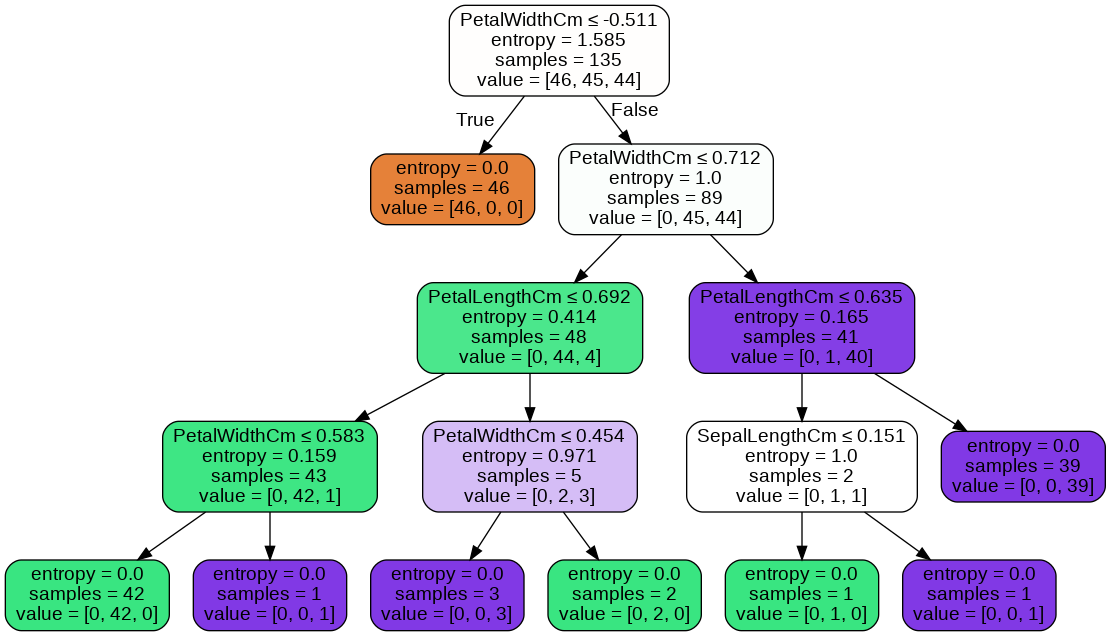

In [11]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=list(dataset.columns[1:-1].values),  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Step 9: Get the predictions on the training set and visualize them

In [12]:
y_pred_train = classifier.predict(x_train)
print(y_pred_train)

[1 1 0 2 1 0 0 0 1 2 0 0 1 1 2 0 0 0 1 2 2 0 0 1 1 1 0 1 1 2 0 1 2 1 2 2 1
 1 2 0 2 1 1 1 0 1 2 2 1 0 1 2 0 1 2 0 1 2 2 0 0 1 0 0 2 2 1 0 2 2 2 2 1 2
 2 1 2 0 2 0 1 2 0 0 1 0 2 1 2 0 0 0 2 0 1 1 1 0 1 1 2 0 2 2 2 0 2 0 0 2 1
 0 1 1 1 0 0 1 2 1 2 1 2 0 0 2 2 0 0 1 1 0 2 2 0]


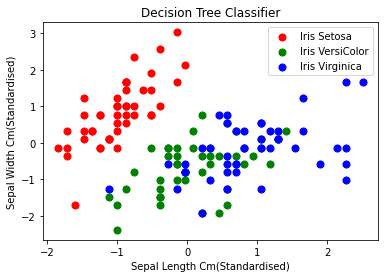

In [13]:
plt.scatter(x_train[y_pred_train == 0,0],x_train[y_pred_train == 0,1], s=50, color = 'red', label='Iris Setosa')
plt.scatter(x_train[y_pred_train == 1,0],x_train[y_pred_train == 1,1], s=50, color = 'green', label='Iris VersiColor')
plt.scatter(x_train[y_pred_train == 2,0],x_train[y_pred_train == 2,1], s=50, color = 'blue', label='Iris Virginica')
plt.title("Decision Tree Classifier")
plt.xlabel("Sepal Length Cm(Standardised)")
plt.ylabel("Sepal Width Cm(Standardised)")
plt.legend()
plt.show()

## Step 10: Get the predictions on the test set and visualize them

In [14]:
y_pred_test = classifier.predict(x_test)
print(y_pred_test)

[0 2 2 0 1 0 1 1 2 1 1 0 2 1 2]


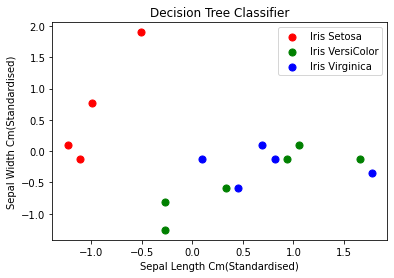

In [15]:
plt.scatter(x_test[y_pred_test == 0,0],x_test[y_pred_test == 0,1], s=50, color = 'red', label='Iris Setosa')
plt.scatter(x_test[y_pred_test == 1,0],x_test[y_pred_test == 1,1], s=50, color = 'green', label='Iris VersiColor')
plt.scatter(x_test[y_pred_test == 2,0],x_test[y_pred_test == 2,1], s=50, color = 'blue', label='Iris Virginica')
plt.title("Decision Tree Classifier")
plt.xlabel("Sepal Length Cm(Standardised)")
plt.ylabel("Sepal Width Cm(Standardised)")
plt.legend()
plt.show()

## Step 11: Evaluate the model

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred_test)
ac = accuracy_score(y_test, y_pred_test)
print(f"Confusion Matrix :\n {cm}")
print(f"Accuracy : {ac*100}%")

Confusion Matrix :
 [[4 0 0]
 [0 5 0]
 [0 1 5]]
Accuracy : 93.33333333333333%
